In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [87]:
data = pd.read_csv('2021_Building_Energy_Benchmarking.csv')

In [88]:
data.describe()

,DataYear,TaxParcelIdentificationNumber,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3601.0,3.601000e+03,3546.000000,3599.000000,3599.000000,3588.000000,3601.000000,3601.000000,3601.000000,3.601000e+03,...,3.503000e+03,1913.000000,674.000000,3.503000e+03,3.503000e+03,3.503000e+03,3.601000e+03,3.601000e+03,3601.000000,3601.000000
mean,2021.0,4.301624e+09,98116.629724,47.624973,-122.334797,2.734950,1973.157456,5.073868,1.166343,1.070763e+05,...,8.831043e+04,33468.793518,14069.373887,9.468902e+05,3.044254e+05,1.552859e+04,3.505269e+06,1.544495e+06,117.812552,1.203332
std,0.0,2.965755e+09,17.039279,0.046517,0.027064,2.238307,34.789269,5.706876,2.197812,2.346923e+05,...,2.887680e+05,60996.425173,31333.794090,2.639922e+06,4.554327e+06,7.689428e+04,1.769375e+07,7.646456e+06,574.615639,2.150329
min,2021.0,0.000000e+00,98101.000000,47.499170,-122.414250,1.000000,1896.000000,0.000000,0.000000,2.000000e+04,...,5.656000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2021.0,1.976200e+09,98105.000000,47.601540,-122.350555,1.000000,1953.000000,3.000000,1.000000,2.961900e+04,...,2.620400e+04,5600.000000,2693.500000,1.787300e+05,0.000000e+00,0.000000e+00,6.004510e+05,0.000000e+00,4.800000,0.100000
50%,2021.0,3.426049e+09,98112.000000,47.619410,-122.332290,1.000000,1980.000000,4.000000,1.000000,4.725800e+04,...,4.225100e+04,12762.000000,5895.500000,3.327620e+05,0.000000e+00,3.609000e+03,1.121646e+06,3.449260e+05,27.900000,0.600000
75%,2021.0,7.129305e+09,98122.000000,47.657120,-122.318580,4.000000,2002.000000,6.000000,1.000000,1.010460e+05,...,8.346650e+04,33673.000000,12847.000000,7.793565e+05,0.000000e+00,1.403050e+04,2.662503e+06,1.363852e+06,91.500000,1.400000
max,2021.0,5.569640e+10,98199.000000,47.733870,-122.258640,7.000000,2021.000000,76.000000,111.000000,9.320156e+06,...,1.521647e+07,750000.000000,480625.000000,7.925876e+07,1.680307e+08,3.737314e+06,9.149541e+08,3.737314e+08,20445.700000,47.400000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3663 non-null   object 
 1   DataYear                         3601 non-null   float64
 2   BuildingName                     3601 non-null   object 
 3   BuildingType                     3601 non-null   object 
 4   TaxParcelIdentificationNumber    3601 non-null   float64
 5   Address                          3601 non-null   object 
 6   City                             3600 non-null   object 
 7   State                            3600 non-null   object 
 8   ZipCode                          3546 non-null   float64
 9   Latitude                         3599 non-null   float64
 10  Longitude                        3599 non-null   float64
 11  Neighborhood                     3599 non-null   object 
 12  CouncilDistrictCode 

In [90]:
data.drop(['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','DataYear',
                       'TaxParcelIdentificationNumber', 'City','Address', 'State',
                       'Latitude','Longitude','CouncilDistrictCode',
                       'PropertyGFABuilding(s)','PropertyGFAParking','SiteEUIWN(kBtu/sf)',
                       'SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)'
                       ],axis=1, inplace=True)


In [91]:
data = data[['BuildingType','OSEBuildingID','YearBuilt','ZipCode','Electricity(kWh)','PropertyGFATotal']]

In [92]:
data.dropna(inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3449 entries, 0 to 3662
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BuildingType      3449 non-null   object 
 1   OSEBuildingID     3449 non-null   object 
 2   YearBuilt         3449 non-null   float64
 3   ZipCode           3449 non-null   float64
 4   Electricity(kWh)  3449 non-null   float64
 5   PropertyGFATotal  3449 non-null   float64
dtypes: float64(4), object(2)
memory usage: 188.6+ KB


In [94]:
data.columns

Index(['BuildingType', 'OSEBuildingID', 'YearBuilt', 'ZipCode',
       'Electricity(kWh)', 'PropertyGFATotal'],
      dtype='object')

In [95]:
data.head()

,BuildingType,OSEBuildingID,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal
0,NonResidential,1,1927.0,98101.0,944955.0,88434.0
1,NonResidential,2,1996.0,98101.0,657478.0,103566.0
2,NonResidential,3,1969.0,98101.0,8673722.0,956110.0
3,NonResidential,5,1926.0,98101.0,509497.0,61320.0
4,NonResidential,8,1980.0,98121.0,1333597.0,175580.0


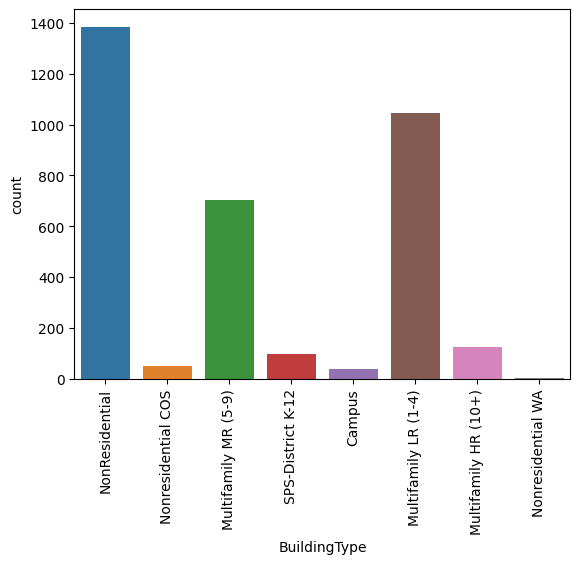

In [96]:
sns.countplot(data = data, x = 'BuildingType')
plt.xticks(rotation=90)
plt.show()

# Retirer data Campus ect car pas assez de données ou améliorer le cleaning

<AxesSubplot: xlabel='YearBuilt', ylabel='OSEBuildingID'>

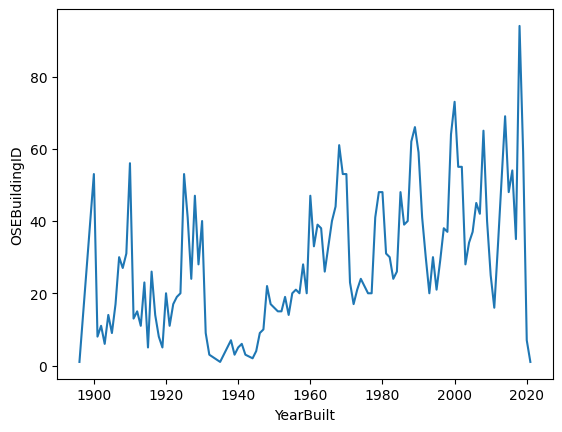

In [97]:
sns.lineplot(x="YearBuilt", y="OSEBuildingID", data=data.groupby('YearBuilt').count().reset_index())

C:\Users\maxpl\AppData\Local\Temp\ipykernel_21260\2757064541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())


<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

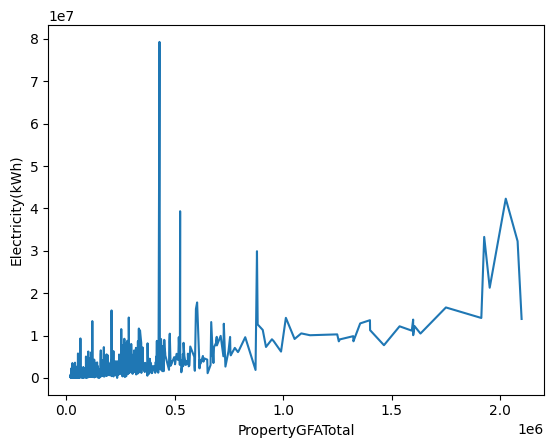

In [98]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())

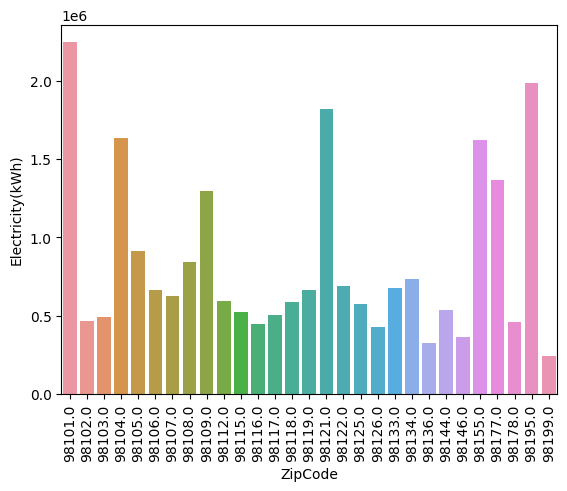

In [99]:
sns.barplot(data=data, x = 'ZipCode', y = 'Electricity(kWh)',errorbar=None)
plt.xticks(rotation=90)
plt.show()  